In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/naya-project-cars-cleaned/cars_cleaned.csv


# Init

In [2]:
# For validation
from sklearn.model_selection import train_test_split as split

In [3]:
# For scoring
from sklearn.metrics import mean_squared_log_error as msle
# from sklearn.metrics import root_mean_squared_error as rmse

In [4]:
from sklearn.linear_model import LinearRegression

# Importing dataset

In [5]:
cars_raw = pd.read_csv('/kaggle/input/naya-project-cars-cleaned/cars_cleaned.csv')

## Data review

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

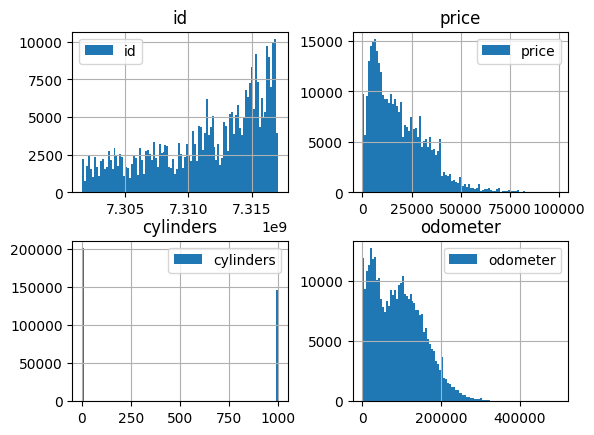

In [6]:
cars_raw.hist(bins=100, legend=True)

In [7]:
cars_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347097 entries, 0 to 347096
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            347097 non-null  int64  
 1   price         347097 non-null  int64  
 2   year          347097 non-null  object 
 3   manufacturer  347097 non-null  object 
 4   model         347097 non-null  object 
 5   condition     347097 non-null  object 
 6   cylinders     347097 non-null  int64  
 7   fuel          347097 non-null  object 
 8   odometer      347097 non-null  float64
 9   transmission  347097 non-null  object 
 10  drive         347097 non-null  object 
 11  size          347097 non-null  object 
 12  type          347097 non-null  object 
 13  paint_color   347097 non-null  object 
 14  state         347097 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 39.7+ MB


In [8]:
cars_raw.isnull().sum()

id              0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [9]:
cars_raw.describe()

,id,price,cylinders,odometer
count,3.470970e+05,347097.000000,347097.000000,347097.000000
mean,7.311492e+09,19113.525585,423.626669,93177.999502
std,4.380328e+06,14354.268064,490.223910,63435.665272
min,7.301583e+09,2.000000,3.000000,0.000000
25%,7.308137e+09,7500.000000,6.000000,38332.000000
50%,7.312634e+09,15990.000000,8.000000,88178.000000
75%,7.315245e+09,27990.000000,999.000000,136216.000000
max,7.317101e+09,99999.000000,999.000000,499232.000000


In [10]:
cars_raw.value_counts()

id          price  year        manufacturer  model                  condition  cylinders  fuel    odometer  transmission  drive  size       type    paint_color  state
7301583321  18997  2013-01-01  dodge         durango                excellent  999        gas     96475.0   automatic     4wd    other      SUV     black        ny       1
7314592555  5990   2010-01-01  dodge         avenger                excellent  4          gas     147835.0  automatic     fwd    other      sedan   other        fl       1
7314592595  10999  2014-01-01  subaru        forester 2.5i premium  other      4          gas     135980.0  manual        4wd    other      wagon   blue         ca       1
7314592581  8494   2004-01-01  ford          ranger                 other      999        gas     156969.0  other         4wd    other      pickup  black        co       1
7314592580  34995  2015-01-01  lexus         ls 460                 like new   8          gas     63306.0   automatic     4wd    full-size  sedan

In [11]:
cars_raw.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
0,7316814884,33590,2014-01-01,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,other,other,other,pickup,white,al
1,7316814758,22590,2010-01-01,chevrolet,silverado 1500,good,8,gas,71229.0,other,other,other,pickup,blue,al
2,7316814989,39590,2020-01-01,chevrolet,silverado 1500 crew,good,8,gas,19160.0,other,other,other,pickup,red,al
3,7316743432,30990,2017-01-01,toyota,tundra double cab sr,good,8,gas,41124.0,other,other,other,pickup,red,al
4,7316356412,15000,2013-01-01,ford,f-150 xlt,excellent,6,gas,128000.0,automatic,rwd,full-size,truck,black,al


# Data manipulations

## temporary moving out cylinders column

In [12]:
# cars = cars_raw.drop('cylinders', axis=1)

## Converting Year column to int

In [13]:
cars_raw['year'] = cars_raw['year'].str.replace('-01-01','')

In [14]:
cars_raw['year'] = cars_raw['year'].astype('int')

In [15]:
cars_raw['year']

0         2014
1         2010
2         2020
3         2017
4         2013
          ... 
347092    2019
347093    2020
347094    2020
347095    2018
347096    2019
Name: year, Length: 347097, dtype: int64

## dropping columns exclude: year, manufacturer, condition, fuel, odometer, state -> price

In [16]:
cars_m1 = cars_raw.drop([ 'cylinders', 'model','transmission', 'drive', 'size', 'type', 'paint_color'], axis=1, errors=False)

In [17]:
cars_m1

,id,price,year,manufacturer,condition,fuel,odometer,state
0,7316814884,33590,2014,gmc,good,gas,57923.0,al
1,7316814758,22590,2010,chevrolet,good,gas,71229.0,al
2,7316814989,39590,2020,chevrolet,good,gas,19160.0,al
3,7316743432,30990,2017,toyota,good,gas,41124.0,al
4,7316356412,15000,2013,ford,excellent,gas,128000.0,al
...,...,...,...,...,...,...,...,...
347092,7301591192,23590,2019,nissan,good,gas,32226.0,wy
347093,7301591187,30590,2020,volvo,good,gas,12029.0,wy
347094,7301591147,34990,2020,cadillac,good,diesel,4174.0,wy
347095,7301591140,28990,2018,lexus,good,gas,30112.0,wy


## Set id as index

In [18]:
cars_m1.set_index('id')

,price,year,manufacturer,condition,fuel,odometer,state
id,,,,,,,
7316814884,33590,2014,gmc,good,gas,57923.0,al
7316814758,22590,2010,chevrolet,good,gas,71229.0,al
7316814989,39590,2020,chevrolet,good,gas,19160.0,al
7316743432,30990,2017,toyota,good,gas,41124.0,al
7316356412,15000,2013,ford,excellent,gas,128000.0,al
...,...,...,...,...,...,...,...
7301591192,23590,2019,nissan,good,gas,32226.0,wy
7301591187,30590,2020,volvo,good,gas,12029.0,wy
7301591147,34990,2020,cadillac,good,diesel,4174.0,wy


In [19]:
cars_m1.describe()

,id,price,year,odometer
count,3.470970e+05,347097.000000,347097.000000,347097.000000
mean,7.311492e+09,19113.525585,2012.155377,93177.999502
std,4.380328e+06,14354.268064,6.266525,63435.665272
min,7.301583e+09,2.000000,1981.000000,0.000000
25%,7.308137e+09,7500.000000,2009.000000,38332.000000
50%,7.312634e+09,15990.000000,2013.000000,88178.000000
75%,7.315245e+09,27990.000000,2017.000000,136216.000000
max,7.317101e+09,99999.000000,2022.000000,499232.000000


In [20]:
cars_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347097 entries, 0 to 347096
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            347097 non-null  int64  
 1   price         347097 non-null  int64  
 2   year          347097 non-null  int64  
 3   manufacturer  347097 non-null  object 
 4   condition     347097 non-null  object 
 5   fuel          347097 non-null  object 
 6   odometer      347097 non-null  float64
 7   state         347097 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.2+ MB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

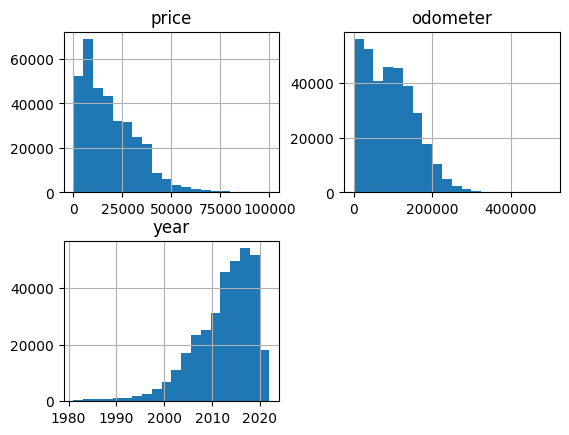

In [21]:
cars_m1.hist(bins=20, column=['price', 'odometer', 'year'])

## transfer non numeric columns to numeric

### transfer condition , set unknown(other) to 0

In [22]:
cars_m1.condition.value_counts()

condition
other        136840
good         108830
excellent     77896
like new      17486
fair           5013
new             861
salvage         171
Name: count, dtype: int64

In [23]:
condition_order = ['other', 'salvage','fair','good','excellent', 'like new', 'new']
condition_mapping = dict(zip(condition_order, [0, 0.2, 0.3, 0.4, 0.6, 0.8, 1]))

In [24]:
condition_mapping

{'other': 0,
 'salvage': 0.2,
 'fair': 0.3,
 'good': 0.4,
 'excellent': 0.6,
 'like new': 0.8,
 'new': 1}

In [25]:
cars_m1['condition'] = cars_m1['condition'].map(condition_mapping)

In [26]:
cars_m1.sample(20)

,id,price,year,manufacturer,condition,fuel,odometer,state
272886,7315836763,21590,2020,volkswagen,0.4,gas,5678.0,pa
86109,7306774556,22900,2008,ford,0.0,gas,79000.0,fl
8870,7316698600,16900,2013,ford,0.3,gas,164000.0,az
245236,7314634920,14500,2012,chevrolet,0.4,gas,217917.0,oh
29064,7314547549,25590,2016,nissan,0.4,gas,38282.0,ca
266252,7308914259,14995,2016,kia,0.0,gas,109489.0,or
185258,7306809574,11400,2011,acura,0.6,gas,132007.0,mt
166134,7316291483,3800,2013,ford,0.3,gas,116401.0,mi
164051,7312782606,68550,2019,ford,0.0,gas,7051.0,mi
151683,7315296783,27990,2013,jeep,0.8,gas,72587.0,ma


In [27]:
cars_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347097 entries, 0 to 347096
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            347097 non-null  int64  
 1   price         347097 non-null  int64  
 2   year          347097 non-null  int64  
 3   manufacturer  347097 non-null  object 
 4   condition     347097 non-null  float64
 5   fuel          347097 non-null  object 
 6   odometer      347097 non-null  float64
 7   state         347097 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 21.2+ MB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>]], dtype=object)

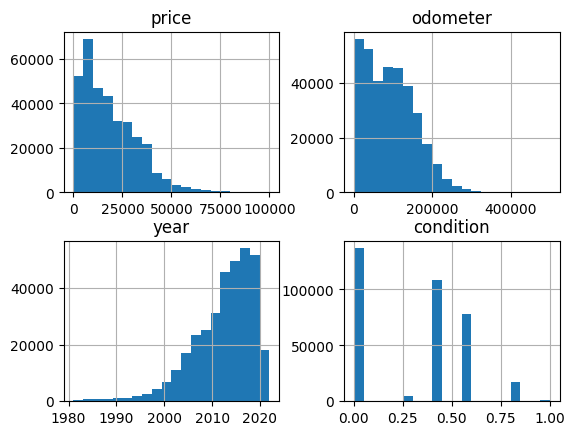

In [28]:
cars_m1.hist(bins=20, column=['price', 'odometer', 'year', 'condition'])

### transfer fuel , set unknow(other) to 0

In [29]:
cars_m1.fuel.value_counts()

fuel
gas         291379
other        28038
diesel       21625
hybrid        4567
electric      1488
Name: count, dtype: int64

In [30]:
fuel_order = ['other','electric', 'hybrid', 'diesel', 'gas']
fuel_mapping = dict(zip(fuel_order, [0, 0.2, 0.4, 0.8, 1]))

In [31]:
fuel_mapping

{'other': 0, 'electric': 0.2, 'hybrid': 0.4, 'diesel': 0.8, 'gas': 1}

In [32]:
cars_m1['fuel'] = cars_m1['fuel'].map(fuel_mapping)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'fuel'}>, <Axes: >]], dtype=object)

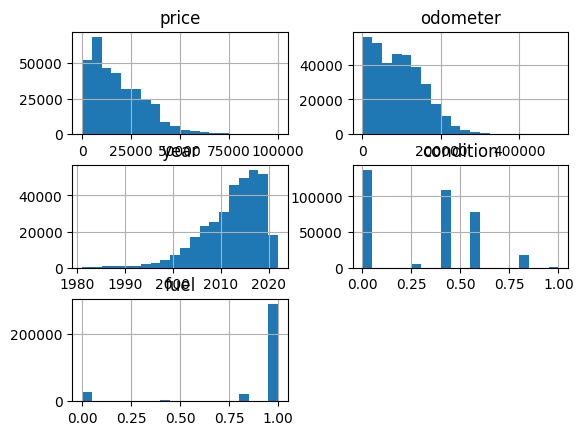

In [33]:
cars_m1.hist(bins=20, column=['price', 'odometer', 'year', 'condition', 'fuel'])

In [34]:
cars_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347097 entries, 0 to 347096
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            347097 non-null  int64  
 1   price         347097 non-null  int64  
 2   year          347097 non-null  int64  
 3   manufacturer  347097 non-null  object 
 4   condition     347097 non-null  float64
 5   fuel          347097 non-null  float64
 6   odometer      347097 non-null  float64
 7   state         347097 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 21.2+ MB


In [35]:
cars_m1.sample(20)

,id,price,year,manufacturer,condition,fuel,odometer,state
66411,7313834196,12950,2016,dodge,0.6,1.0,74611.0,ct
307670,7309854474,3500,2013,dodge,0.0,1.0,106255.0,tx
223913,7316901460,399,2018,dodge,0.0,1.0,31861.0,ny
135481,7303590641,23990,2015,cadillac,0.4,0.0,57304.0,ks
123804,7308400907,3750,2007,kia,0.6,1.0,87000.0,in
84487,7313950212,2099,2001,chevrolet,0.3,1.0,309754.0,fl
284667,7303674087,45999,2020,gmc,0.0,0.0,28580.0,sc
111071,7314374960,800,1999,volkswagen,0.3,1.0,182894.0,id
118594,7306069489,3995,2008,ford,0.0,1.0,99999.0,il
212840,7311305413,23990,2017,toyota,0.4,1.0,56692.0,nm


In [36]:
cars_m1 = cars_m1.set_index('id')

In [37]:
cars_m1.sample(20)

,price,year,manufacturer,condition,fuel,odometer,state
id,,,,,,,
7316505379,24990,2015,ford,0.8,1.0,1000.0,tx
7307940755,5000,2006,honda,0.4,1.0,177000.0,nc
7307669098,20990,2018,mazda,0.0,1.0,12695.0,tx
7314611738,42000,2013,ram,0.6,1.0,45500.0,mt
7311854499,21988,2018,honda,0.0,1.0,57074.0,ia
7315353643,4250,2001,chevrolet,0.0,1.0,106830.0,va
7312530802,36949,2017,lincoln,0.0,1.0,83988.0,ar
7315296146,7495,2010,volvo,0.0,0.0,144827.0,dc
7309694623,45990,2020,rover,0.4,1.0,4157.0,tx


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'fuel'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

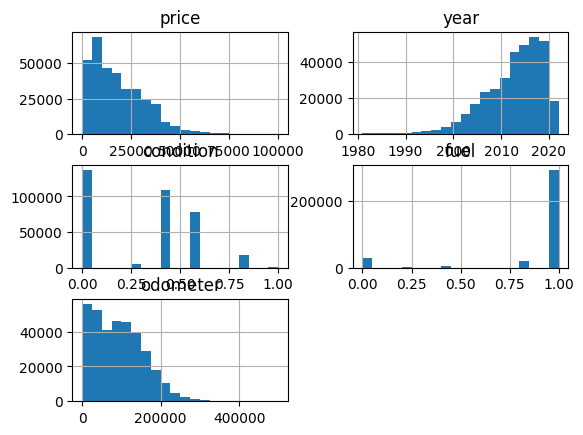

In [38]:
cars_m1.hist(bins=20)

In [39]:
cars_m1['odometer'] = cars_m1['odometer'].astype('int')

In [40]:
cars_m1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347097 entries, 7316814884 to 7301591129
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         347097 non-null  int64  
 1   year          347097 non-null  int64  
 2   manufacturer  347097 non-null  object 
 3   condition     347097 non-null  float64
 4   fuel          347097 non-null  float64
 5   odometer      347097 non-null  int64  
 6   state         347097 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 21.2+ MB


In [41]:
cars_m1.head(20)

,price,year,manufacturer,condition,fuel,odometer,state
id,,,,,,,
7316814884,33590,2014,gmc,0.4,1.0,57923,al
7316814758,22590,2010,chevrolet,0.4,1.0,71229,al
7316814989,39590,2020,chevrolet,0.4,1.0,19160,al
7316743432,30990,2017,toyota,0.4,1.0,41124,al
7316356412,15000,2013,ford,0.6,1.0,128000,al
7316343444,27990,2012,gmc,0.4,1.0,68696,al
7316304717,34590,2016,chevrolet,0.4,1.0,29499,al
7316285779,35000,2019,toyota,0.6,1.0,43000,al
7316257769,29990,2016,chevrolet,0.4,1.0,17302,al


## Convert object manufacturer to numeric value and nomolize to 0 to 1

In [42]:
median_per_category = cars_m1.groupby('manufacturer')['price'].median()

In [43]:
normalized_median = (median_per_category - median_per_category.min()) / (median_per_category.max() - median_per_category.min())

In [44]:
cars_m1['manufacturer'] = cars_m1['manufacturer'].map(normalized_median)

In [45]:
cars_m1.head()

,price,year,manufacturer,condition,fuel,odometer,state
id,,,,,,,
7316814884,33590,2014,0.275743,0.4,1.0,57923,al
7316814758,22590,2010,0.178359,0.4,1.0,71229,al
7316814989,39590,2020,0.178359,0.4,1.0,19160,al
7316743432,30990,2017,0.149762,0.4,1.0,41124,al
7316356412,15000,2013,0.195006,0.6,1.0,128000,al


### State

In [46]:
# cars_m1 = pd.get_dummies(cars_m1['state'], prefix='state')
cars_m1 = pd.get_dummies(cars_m1, columns=['state'], prefix='state')


In [47]:
cars_m1.head()

,price,year,manufacturer,condition,fuel,odometer,state_ak,state_al,state_ar,state_az,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
id,,,,,,,,,,,,,,,,,,,,,
7316814884,33590,2014,0.275743,0.4,1.0,57923,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7316814758,22590,2010,0.178359,0.4,1.0,71229,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7316814989,39590,2020,0.178359,0.4,1.0,19160,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7316743432,30990,2017,0.149762,0.4,1.0,41124,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7316356412,15000,2013,0.195006,0.6,1.0,128000,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Model

## splitting data

In [48]:
X = cars_m1.drop('price', axis=1)
y = cars_m1.price

In [49]:
X.head()

,year,manufacturer,condition,fuel,odometer,state_ak,state_al,state_ar,state_az,state_ca,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
id,,,,,,,,,,,,,,,,,,,,,
7316814884,2014,0.275743,0.4,1.0,57923,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316814758,2010,0.178359,0.4,1.0,71229,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316814989,2020,0.178359,0.4,1.0,19160,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316743432,2017,0.149762,0.4,1.0,41124,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316356412,2013,0.195006,0.6,1.0,128000,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
y.head()

id
7316814884    33590
7316814758    22590
7316814989    39590
7316743432    30990
7316356412    15000
Name: price, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3)

In [52]:
X_train.head()

,year,manufacturer,condition,fuel,odometer,state_ak,state_al,state_ar,state_az,state_ca,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
id,,,,,,,,,,,,,,,,,,,,,
7314985485,2008,0.221165,0.0,1.0,160964,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7307744700,2019,0.275743,0.0,1.0,23989,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7315527258,2019,0.129798,0.4,0.0,16068,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7308735438,2011,0.124851,0.4,1.0,16796,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7315646799,2018,0.149762,0.6,1.0,25411,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
X_test.head()

,year,manufacturer,condition,fuel,odometer,state_ak,state_al,state_ar,state_az,state_ca,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
id,,,,,,,,,,,,,,,,,,,,,
7316365180,2004,0.178359,0.4,1.0,233000,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7316741591,2008,0.149762,0.6,0.4,199000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7315056905,2011,0.090309,0.6,1.0,173272,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7310782628,2013,0.203270,0.6,1.0,97420,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7316247403,2013,0.195006,0.0,1.0,74833,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
y_train.head()

id
7314985485    12990
7307744700    41999
7315527258    39590
7308735438    35590
7315646799    35000
Name: price, dtype: int64

In [55]:
y_test.head()

id
7316365180     2700
7316741591     4500
7315056905    11000
7310782628    17998
7316247403    19995
Name: price, dtype: int64

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242967 entries, 7314985485 to 7314438949
Data columns (total 56 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          242967 non-null  int64  
 1   manufacturer  242967 non-null  float64
 2   condition     242967 non-null  float64
 3   fuel          242967 non-null  float64
 4   odometer      242967 non-null  int64  
 5   state_ak      242967 non-null  bool   
 6   state_al      242967 non-null  bool   
 7   state_ar      242967 non-null  bool   
 8   state_az      242967 non-null  bool   
 9   state_ca      242967 non-null  bool   
 10  state_co      242967 non-null  bool   
 11  state_ct      242967 non-null  bool   
 12  state_dc      242967 non-null  bool   
 13  state_de      242967 non-null  bool   
 14  state_fl      242967 non-null  bool   
 15  state_ga      242967 non-null  bool   
 16  state_hi      242967 non-null  bool   
 17  state_ia      242967 non-null  bool   
 

In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104130 entries, 7316365180 to 7306379441
Data columns (total 56 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          104130 non-null  int64  
 1   manufacturer  104130 non-null  float64
 2   condition     104130 non-null  float64
 3   fuel          104130 non-null  float64
 4   odometer      104130 non-null  int64  
 5   state_ak      104130 non-null  bool   
 6   state_al      104130 non-null  bool   
 7   state_ar      104130 non-null  bool   
 8   state_az      104130 non-null  bool   
 9   state_ca      104130 non-null  bool   
 10  state_co      104130 non-null  bool   
 11  state_ct      104130 non-null  bool   
 12  state_dc      104130 non-null  bool   
 13  state_de      104130 non-null  bool   
 14  state_fl      104130 non-null  bool   
 15  state_ga      104130 non-null  bool   
 16  state_hi      104130 non-null  bool   
 17  state_ia      104130 non-null  bool   
 

## Linear regression

In [58]:
lin_model_1 = LinearRegression(fit_intercept=True)

In [59]:
lin_model_1.fit(X_train, y_train)

LinearRegression()